# U4_ALGORITMO GENETICO

In [35]:
import numpy
import functools
import operator
import imageio
import numpy as np
import matplotlib.pyplot
import pygad
import ipywidgets as widgets

In [60]:
#COLORS
blue= imageio.v2.imread("blue.png")
blue= numpy.asarray(blue/255, dtype=float)

red= imageio.v2.imread("red.png")
red= numpy.asarray(red/255, dtype=float)

yellow= imageio.v2.imread("yellow.png")
yellow= numpy.asarray(yellow/255, dtype=float)

green= imageio.v2.imread("green.png")
green= numpy.asarray(green/255, dtype=float)

black= imageio.v2.imread("black.png")
black= numpy.asarray(black/255, dtype=float)

COLORS

<img src="red.png"  width="50" height="200" align="left">
<img src="blue.png"  width="50" height="200" align="left">
<img src="yellow.png"  width="50" height="200" align="left">
<img src="green.png"  width="50" height="200" align="left">
<img src="black.png"  width="50" height="200" align="left">
<br><br><br>

RED - BLUE - YELLOW - GREEN - BLACK

In [61]:
#GARI MODULE
def img2chromosome(img_arr):
    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [69]:
# SELECTION

#RED,BLUE,GREEN,YELLOW,BLACK
target_chromosome = img2chromosome(red)


widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [63]:
#FITNESS MODULE

def fitness_fun(solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [64]:
#INSTANCE PYGAD
ga_instance = pygad.GA(num_generations=13000,
                       num_parents_mating=10,    #MATING POOL SIZE
                       fitness_func=fitness_fun,
                       sol_per_pop=20,           #POPULATION SIZE
                       num_genes=red.size,   #CHANGE SIZE
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

In [65]:
ga_instance.run()

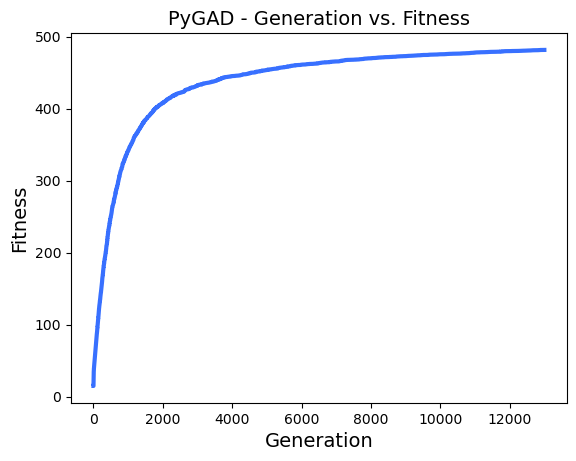

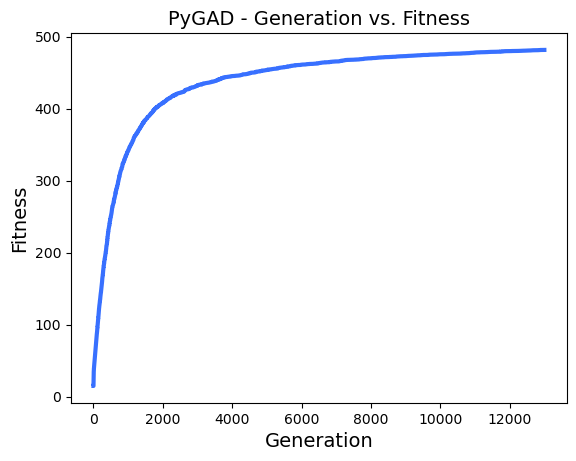

In [70]:
ga_instance.plot_result()

Fitness value of the best solution = 481.681903443775
Index of the best solution : 0
Best fitness value reached after 12984 generations.


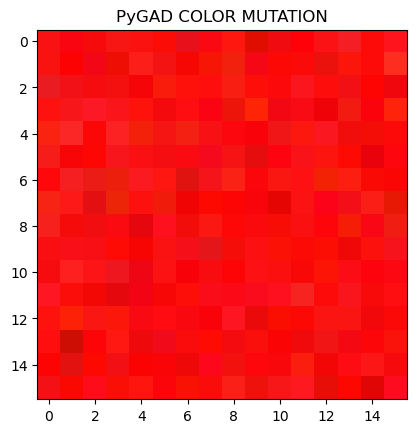

In [71]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = chromosome2img(solution, red.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD COLOR MUTATION")
matplotlib.pyplot.show()